In [12]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
%matplotlib inline

In [13]:
class neural_network(object):
    
    def __init__(self, netarch, n_epochs=1000, eta=0.1, printing=False):
        
        #initialize layer and unit info
        self.num_layers = len(netarch) #number of layers
        self.netarch = netarch #number of units in each layer
        self.n_epochs = n_epochs #number of epochs
        self.eta = eta #learning rate
        self.printing = printing #printing options
        
        #initialize weights and bias matrices
        self.initialize_weight_bias()
        
        #printing options
        if printing:
            print('#'*40)
            print('Neural Net v1.0')
            print('#'*40)
            
            print('Initializing neural network...')
            time.sleep(2)
            
            print('\nActivation: Sigmoid')
            print('Number of layers: {} ({} hidden)'.format(self.num_layers,self.num_layers-2))
            print('-'*40)
            
            
            for i, units in enumerate(self.netarch):
                if i == 0:
                    print('Input Layer: {} units'.format(units))
                
                elif i == len(netarch)-1:
                    print('Output Layer: {} units'.format(units))
                
                else:
                    print('Hidden Layer: {} units'.format(units))
            
            print('-'*40)
            
            #for w, b in zip(self.w_keys, self.b_keys):
            #    print(w, self.weights[w].shape)
            #    print(b, self.biases[b].shape)

        print('#'*40)
        
    def initialize_weight_bias(self):
        weights = {}
        biases = {}
        
        #create weight and bias matrix for each layer
        for i, layer in enumerate(self.netarch):
            
            if i == len(self.netarch)-1:
                continue
            
            #if connected to output layer...'out' in name key
            if i == len(netarch)-2:
                weights["wout{0}".format(i)] = np.random.uniform(size=(self.netarch[i], self.netarch[i+1]))
                biases["bout{0}".format(i)] = np.random.uniform(size=(1, self.netarch[i+1]))
            
            else:
                weights["wh{0}".format(i)] = np.random.uniform(size=(self.netarch[i], self.netarch[i+1]))
                biases["bh{0}".format(i)] = np.random.uniform(size=(1, self.netarch[i+1]))
                
        self.weights = weights
        self.biases = biases
        self.w_keys = list(self.weights.keys())
        self.b_keys = list(self.biases.keys())
        
    def initialize_activations(self):
        
        layer_activations = {'input': self.X}
        
        for i, units in enumerate(self.netarch):
                if i == 0:
                    layer_activations['input'] = self.X
                
                elif i == len(netarch)-1:
                    layer_activations['output'] = None
                
                else:
                    layer_activations['HL{}'.format(i)] = None
                    
        self.layer_activations = layer_activations
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          :Training vectors, where n_samples is the number of samples and n_features is the number of features.
        
        y : array-like, shape = [n_samples]
          :Target values
        
        Returns
        -------
        self : object
        """  
        print('Fitting neural network...')
        time.sleep(2)
        
        self.X = X
        self.y = y
        
        
        ws = [None]
        bs = [None]
        
        for w in self.w_keys:
            ws.append(w)
        for b in self.b_keys:
            bs.append(b)
        
        self.initialize_activations()
        #print(len(self.layer_activations), len(ws), len(bs))
        
        self.epoch_error = []
        
        activ_update = {}
        
        for i in range(self.n_epochs):
        
            ##############################
            ## Feed-Forward Propogation ##
            ##############################
            
            #for each layer...feed forward
            for i, (weight, bias) in enumerate(zip(ws, bs)):
                #print(activ_update.keys())
                #print(i, weight, bias)
                
                #if first layer...no activation to calculate --> X_train
                if i == 0:
                    pass
                
                #if first hidden layer...activation is input X_train
                elif i == 1:
                    input_act = self.X
                    activ_update['HL{}'.format(i)] = self.feed_forward(input_act, self.weights[weight], self.biases[bias])
                    #print('input_activation:','X', input_act)
            
                #if last layer, save activation as 'output'
                elif i == len(ws)-1:
                    #feed prior layer's activation and name 'output'
                    inpt = list(activ_update.keys())[i-2]
                    input_act = activ_update[inpt]
                    activ_update['output'] = self.feed_forward(input_act, self.weights[weight], self.biases[bias])
                    #print('input_activation:', inpt, input_act)
                
                else:
                    #feed prior layer's activation and name 'HL_'
                    inpt = list(activ_update.keys())[i-2]
                    input_act = activ_update[inpt]
                    activ_update['HL{}'.format(i)] = self.feed_forward(input_act, self.weights[weight], self.biases[bias])
                    #print('input_activation:',inpt, input_act)
                    
                    
                #print()
             
            self.layer_activations = activ_update
            
             ##############################
             ###### Back-Propogation ######
             ##############################
                
            self.backprop()
            self.update_weights_bias()
        
        print('-'*40)
        print('Locked and loaded.')
        print('#'*40)
        
        return self
            
    
    def feed_forward(self, inpt, weight, bias):
        #feed forward propogation
        layer_input = np.dot(inpt, weight)
        layer_input += bias
        layer_activation = self.sigmoid(layer_input)
        return layer_activation
    
    def backprop(self):
        acts_rev = list(self.layer_activations)[::-1]
        output = self.layer_activations['output']
    
        #calculate output error
        output_error = self.y - output #actual - output
        
        #record epoch MSE
        epoch_mse = np.mean(output_error**2) #mean squared error
        self.epoch_error.append(epoch_mse) #record epoch error
        
        #prep errors with zero vectors for each layer
        errors= {}
        
        for activation in acts_rev:
            errors['{}_error'.format(activation)] = np.zeros(len(output_error))
        
        #update 'output_error'
        errors['output_error'] = output_error
        
        ## 
        ##calculate gradients for each activation layer
        ##
        
        gradients = {}
        
        for activation in acts_rev:
            #derivative of sigmoid activation function
            gradients['{}_gradient'.format(activation)] = self.sigmoid_prime(self.layer_activations[activation]) 
            
            
        ##
        ##compute change factor delta for each layer, dependent on its gradient of error * gradient of its activation 
        ##
        
        deltas = {}
        
        #for each layer, going backwards...
        for i, (activation, gradient, error) in enumerate(zip(acts_rev, gradients, errors)):
            
            #compute layer delta
            deltas['delta_{}'.format(activation)] = errors[activation+'_error'] * gradients[activation+'_gradient']
        
            #if not headed into input layer...(b/c there is no error from the input)
            if i == len(acts_rev)-1:
                continue
            
            #compute error from previous layer (i.e if output, find error for last hidden layer)
            else:
                errors[acts_rev[i+1]+'_error'] = np.dot(deltas['delta_'+activation], self.weights[self.w_keys[::-1][i]].T)
        
        #save
        self.gradients = gradients
        self.deltas = deltas
        self.errors= errors

        ##
        ##REFERENCE MATERIAL
        ##
        
        #output wout1 bout1
        #HL1 wh0 bh0
        
        #d_output = output_erro * output_gradient
        #HL1_error = d_output.dot(wout.T)
        #d_HL = HL1_error * HL1_gradient
        
        
    def update_weights_bias(self):
        #get layers backwards
        acts_rev = list(self.layer_activations)[::-1]
        w_keys_rev = list(self.w_keys)[::-1]
        b_keys_rev = list(self.b_keys)[::-1]
        
        #grab current weight matricies for update
        update_weights = self.weights
        update_bias = self.biases
        
        #for each layer, moving backwards...
        for i, (activation, weight, bias) in enumerate(zip(acts_rev, w_keys_rev, b_keys_rev)):          
            #output wout1 bout1
            #HL1 wh0 bh0
            
            #retrieve layer delta
            delta_ = self.deltas['delta_'+activation]
            delta_ = np.array(delta_, 'float')
            
            #update bias vector
            update_bias[bias] += np.sum(delta_, axis=0, keepdims=True) * self.eta
            
            #if headed into input layer...
            if i == len(acts_rev)-1:
                
                #use input X to update weight matrix
                update_weights[weight] += X.T.dot(delta_) * self.eta
                
            #otherwise...
            else:
                
                #use layer's activation feed to...
                act = self.layer_activations[acts_rev[i+1]]
                act = np.array(act, 'float')
                
                #update weight matrix
                update_weights[weight] += act.T.dot(delta_) * self.eta
            
        #save updated weight and bias matricies   
        self.weights = update_weights
        self.biases = update_bias  
     
    
    ##Miscellaneous functions  
    def sigmoid(self, z):
        """Transforms z to real number between 0 and 1"""
        sigmoid = 1.0 / (1.0 + np.exp(-z))
        
        return sigmoid
    
    def sigmoid_prime(self, x):
        """Derivative of sigmoid"""
        sigmoid_prime = x * (1 - x)
        
        return sigmoid_prime
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(X >= 0.5, 1, 0)
    
    def score(self, X, y):
        """Score the model --> Actual vs Predicted Classes"""
        results = np.equal(X,y)
        correct = np.sum(results)
        score = float(correct) / float(len(results))
        return score

In [14]:
#import sklearn
#from sklearn.datasets import load_breast_cancer
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#
##load data
#raw = sklearn.datasets.load_breast_cancer()
##
###optional description
###[print(line) for line in raw.DESCR.split('\n')]
#
###load feature and target d
#X = pd.DataFrame(raw.data, columns=raw.feature_names).values
#y = pd.Series(raw.target).values

In [15]:
#Input array
X=np.array([[1,0,1,0],[1,0,1,1],[0,1,0,1]])

#Output
y=np.array([[1],[1],[0]])

In [16]:
#define dimensions and number of classes
dims = X.shape[1]
nb_classes = pd.DataFrame(y).shape[1]

In [17]:
#standardize the data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

C:\Users\Will\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
#cross-validation
#X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=.3)

In [19]:
#define network architecture

#input layer with same dimensions as feature set
input_layer = dims

#user-defined units in hidden layer
hidden_layer1 = dims * 1.2
#hidden_layer2 = dims * 1.2
#hidden_layer3 = dims * 1.2
        
#output layer with 1 unit; one for each class        
output_layer = nb_classes

#netarch
netarch = [input_layer,
           hidden_layer1,
           #hidden_layer2,
           #hidden_layer3,
           output_layer]

#ensure all elements are integers
netarch = [int(layer) for layer in netarch]

In [20]:
#run neural net
net = neural_network(netarch, n_epochs=5000, eta=0.1, printing=True)
net.fit(X,y)

########################################
Neural Net v1.0
########################################
Initializing neural network...

Activation: Sigmoid
Number of layers: 3 (1 hidden)
----------------------------------------
Input Layer: 4 units
Hidden Layer: 4 units
Output Layer: 1 units
----------------------------------------
########################################
Fitting neural network...
----------------------------------------
Locked and loaded.
########################################


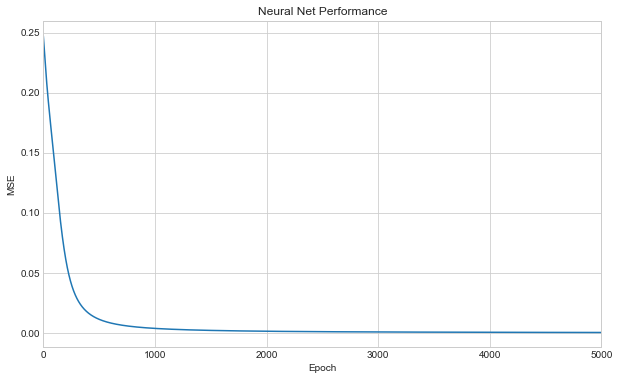

In [21]:
pd.Series(net.epoch_error).plot(figsize=(10,6))
plt.title('Neural Net Performance')
plt.xlabel('Epoch')
plt.ylabel('MSE')